#Exploratory Data Analysis 

###############################################################################

This is the second section where we will be further analysing the speeches to find more insights

A detailed walkthrough of this project can be found here : [Comprehensive Analysis on Indian Finance Minsters](https://pradeep.code.blog/2020/05/29/comprehensive-analysis-on-indian-finance-ministers/)


###############################################################################

Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import plotly.graph_objs as go
from plotly import tools

Reading the data file

In [4]:
speech_df = pd.read_pickle('/content/drive/My Drive/Projects/Capstone Project/Final Personal Capstone/Speech_df.pkl')
speech_df.head()

,Finance_Minister,Date,Speech,Speech_clean
0,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budget i...",interim regular economy grave uncertainties Gr...
1,Pranab Mukherjee,"February 26, 2010","2. It was not clear to us, as also to...",us policy makers many countries crisis eventua...
2,Pranab Mukherjee,"February 26, 2010","3. At home, there was added uncertain...",At home added uncertainty account delayed sub ...
3,Pranab Mukherjee,"February 26, 2010","4. Today, as I stand before you, I ca...",stand say confidence weathered crises well eco...
4,Pranab Mukherjee,"February 26, 2010",5. The three challenges and the mediu...,three challenges medium term perspective outli...


Dimension of Dataframe

In [5]:
speech_df.shape

(16224, 4)

Basic information of Dataframe & Verifying Null Values

In [6]:
speech_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16224 entries, 0 to 277
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Finance_Minister  16224 non-null  object
 1   Date              16224 non-null  object
 2   Speech            16224 non-null  object
 3   Speech_clean      16224 non-null  object
dtypes: object(4)
memory usage: 633.8+ KB


Visualizing the Word Cloud of all the speeches individually

In [7]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS as wcloud_stop
stopwords = set(wcloud_stop)

stop_words = ["Arun", "Jaitley", "Budget",'Minister','Speaker','Madam','Sir','dtype','Nmae','Clean',
              'Speech','India','Ju','page','CONTENTS','quo','allow','Name','ne','words','Length','seek',
              'scope','Pranab','Mukherjee','Chidambaram','Piyush','Goyal','Nirmala','Sitharaman',
             'year','po','stan','cha','object','pre','re','hold','speecha','wi','touc','presented','bs',
             'Budg','February','placed','eventuall','fu','far','positi','ear','provided','worl','facing',
             'year','sections','ago','popu','different','Indian','morning','Indi','happens','vel','yea',
             'said','let','gives','Nehru','Jawaharlal','remain','Anru','fi','VIII','VI','IX','VII','gr',
             'iv','Secto','deo','new','item','iii','Chapter','non','ii','ho','litre','years','Fe',
             'Naren','Shri','etc','adm','la','fina','august','month','July','july','Vivekananda','Swami',
             'Finance','relating','relati', 'NPS','cri','House','gra','kol','Roa','IMF','RWA','aa','AAI',
             'AAM','ab','AAR','abs','ACA','ad','ADR','AEC','AI','AIF','AMC','AP','APA','APT','ARC','ARCs',
             'AVGC','ATUFS','ASPIRE','hands','know','time','tomorrow','today','Today','eighth','seventh',
             'sure','day','eariler','agents','Note','means','given','Prime','run','Annex','write','found',
             'example','rest','Ahead','Annexes','Act','intent','gave','member','present','Thiruvalluvar',
             'present','joins','clear','taking'] + list(stopwords)

In [8]:
# Defining a function that generates WordClouds 
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        max_words=900,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [9]:
#Generating WordClouds for each of the speeches

for dt in speech_df['Date'].unique():
    a = speech_df[speech_df['Date'] == dt]
    tit = a['Finance_Minister'].unique()+dt
    show_wordcloud(a['Speech_clean'], title = tit)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=5d4e469e410e6c68ae98d3e060c6ea384577860efbcc0facba56d7a7bc0b50fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-kffapy6k/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


Visualizing important words from each speech

In [10]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [11]:
#marix = []
words = []
speech_split=[]
title =[]
#i=0

for dt in speech_df['Date'].unique():
    a = speech_df[speech_df['Date'] == dt]
    tit = a['Finance_Minister'].unique()+": "+dt
    for doc in nlp.pipe(a['Speech_clean'].astype('unicode').values,batch_size=50,n_threads=3):
    #matrix.append([n.text for n in doc])
        #if i == 5:
            #break
        #else:
            #i=i+1
        for n in doc:
            #print(n)
            words.append(n.text.lower())
    speech_split.append(words)
    title.append(tit)
    words = []

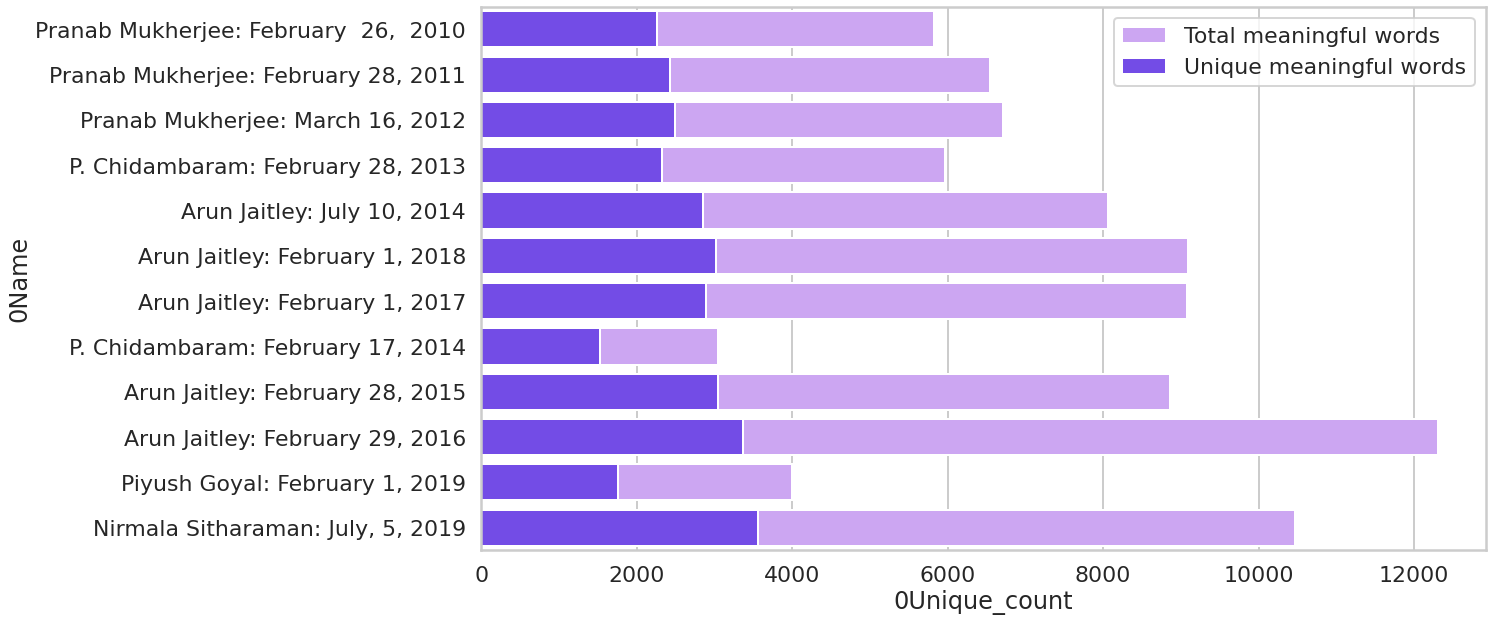

In [17]:
s=(pd.DataFrame(title))
global_word_count=pd.DataFrame()
length=[]
for i in range(0,len(speech_split)):
    length.append(len(speech_split[i]))
dcf=pd.DataFrame(title)
dcf=dcf.join(pd.DataFrame(length),lsuffix='Name',rsuffix='length')

from collections import Counter
unique_count=[]
j=0
for i in speech_split:
    gg=pd.DataFrame.from_dict(Counter(i), orient='index').reset_index()
    gg=gg.rename(columns={0:'count','index':'word'})
    gg['title']= s[0].loc[j]
    global_word_count=global_word_count.append(gg,ignore_index=True)
    unique_count.append(gg['count'].count())
    j=j+1
    

dcf_unique=pd.DataFrame(title)
dcf_unique=dcf_unique.join(pd.DataFrame(unique_count),lsuffix='Name',rsuffix='Unique_count')
z=dcf_unique.set_index('0Name').join(dcf.set_index('0Name'))
z=z.reset_index()
#gg.sort_values(by=['count'],ascending=False).tail()
z=z.sort_values('0Unique_count').reset_index().drop(columns=['index'])

import seaborn as sns
sns.set({'axes.facecolor': 'black'},style="whitegrid")
sns.set_context("poster")
fig, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(x="0length", y="0Name",label="Total meaningful words", data=dcf,color='#cc99ff')
ax = sns.barplot(x="0Unique_count", y="0Name",label="Unique meaningful words",color='#6633ff', data=dcf_unique)
ax.legend()

Visualizing word count frequency of each speech

In [18]:
def hist(x,tit):
    fig = plt.figure(2, figsize=(10,5))
    ax=sns.distplot(x,color="#6942f5")
    #ax.set_yscale('log')
    fig.suptitle(tit, fontsize=20)
    plt.xlabel('word count frequency', fontsize=14,color="#6942f5")
    plt.xticks(fontsize=14,color="#6942f5" )
    plt.yticks(fontsize=14,color="#6942f5" )
    plt.show()
    

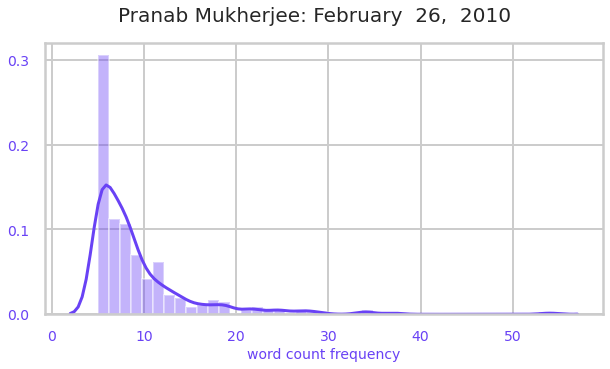

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



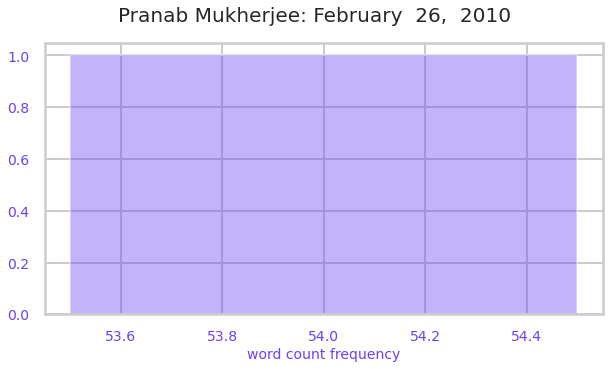

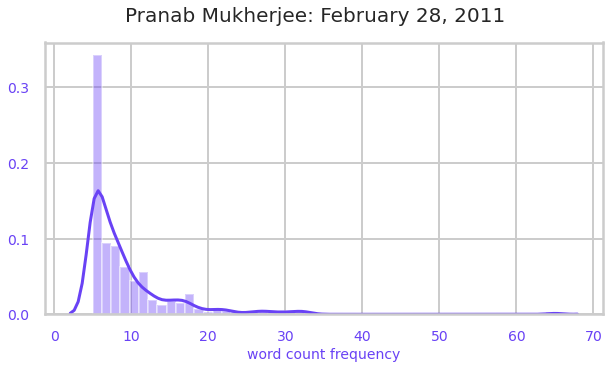

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



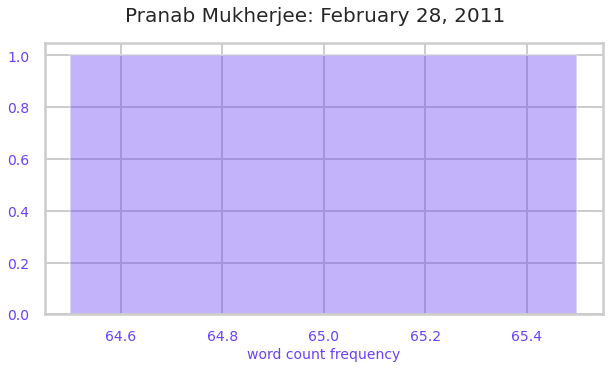

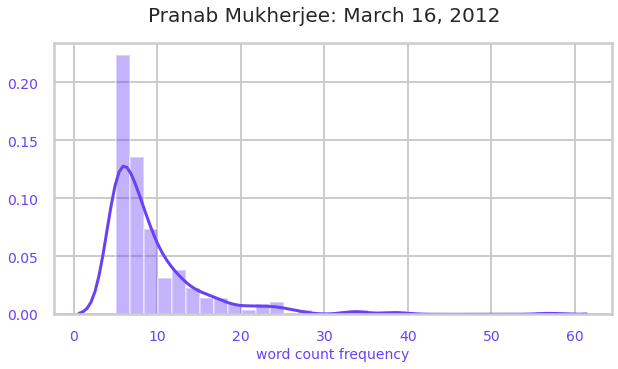

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



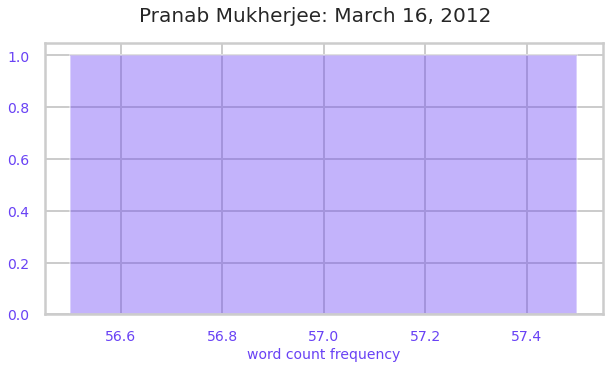

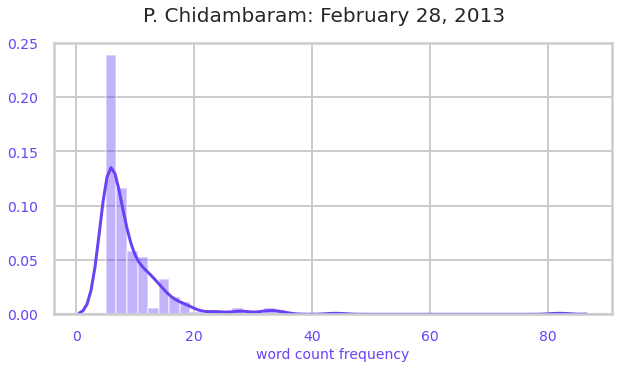

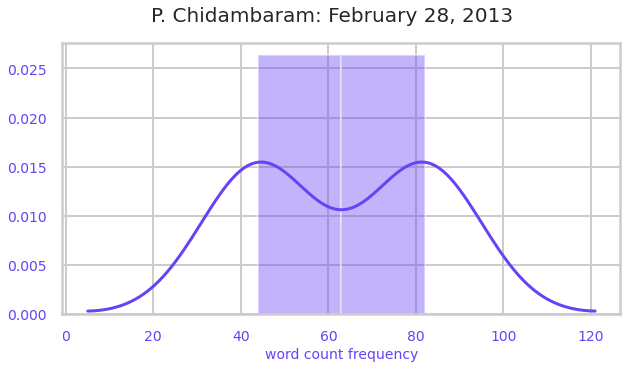

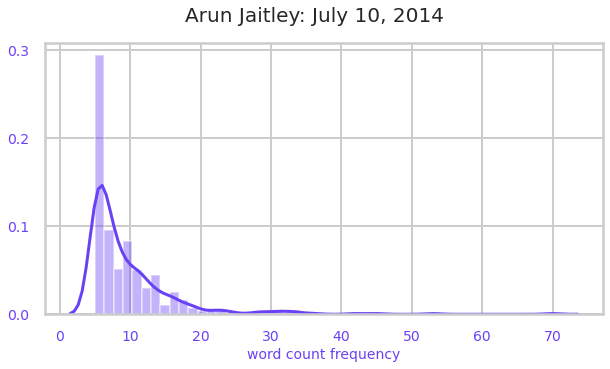

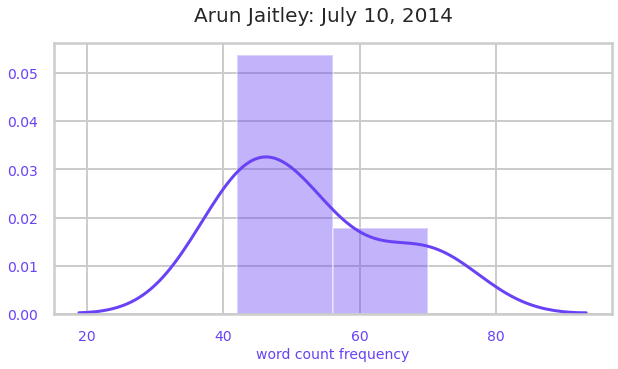

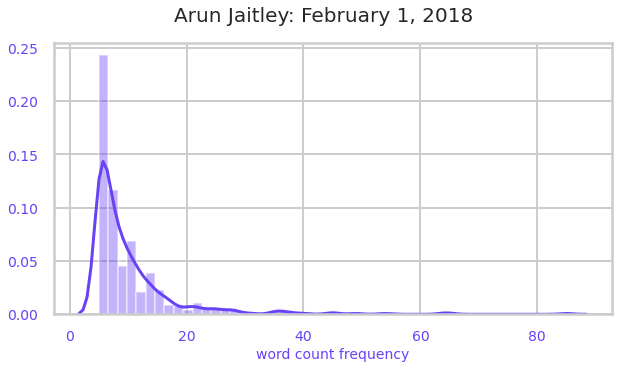

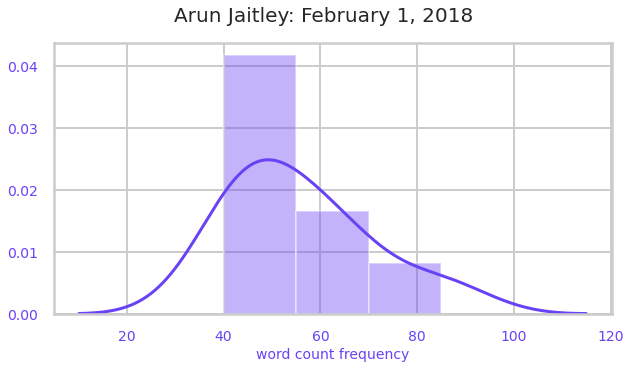

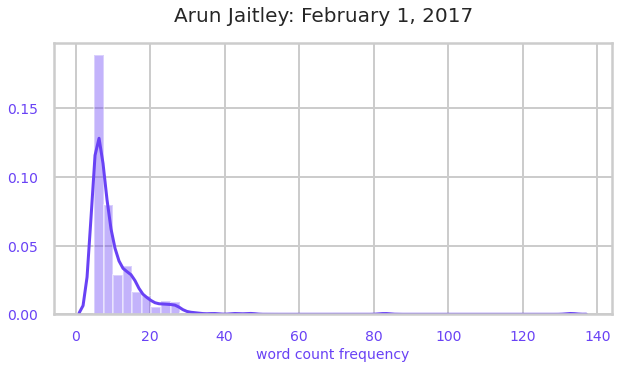

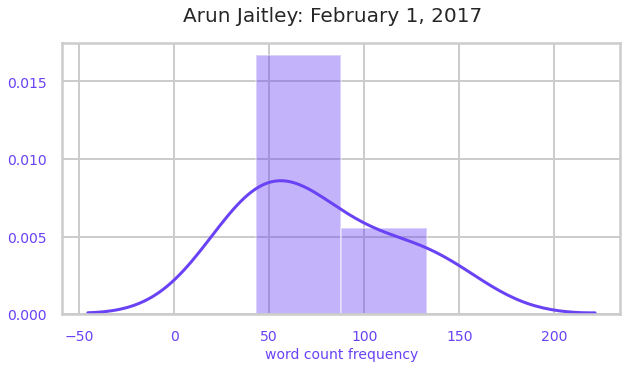

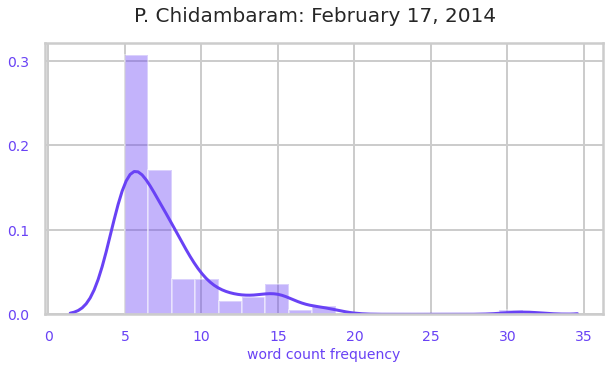

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:908: RuntimeWarning:

invalid value encountered in true_divide



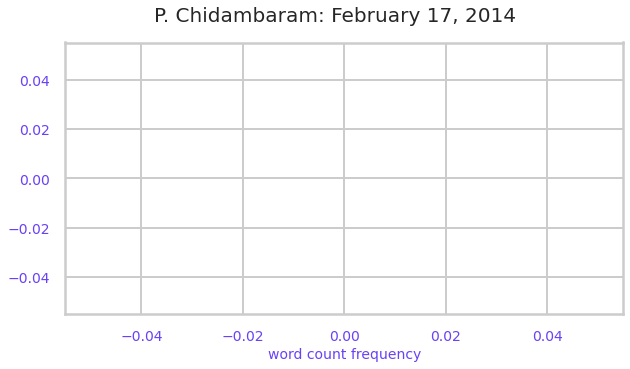

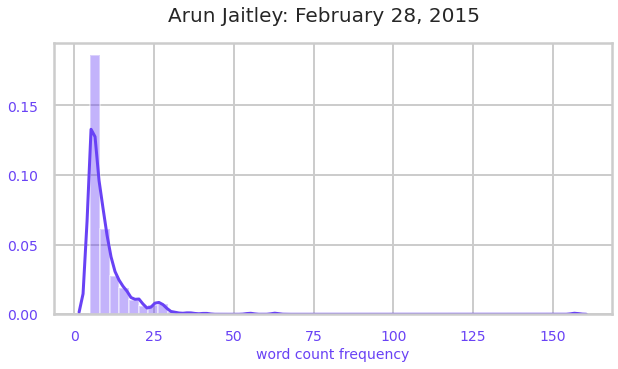

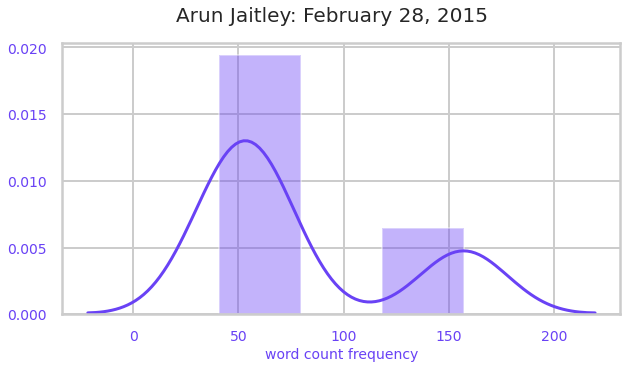

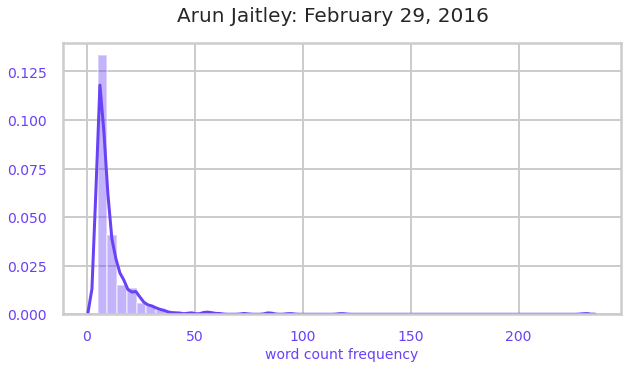

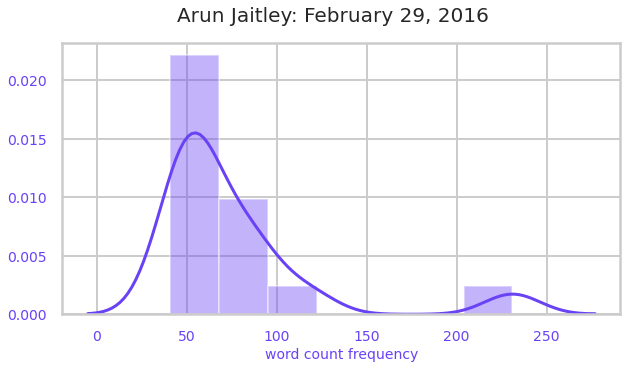

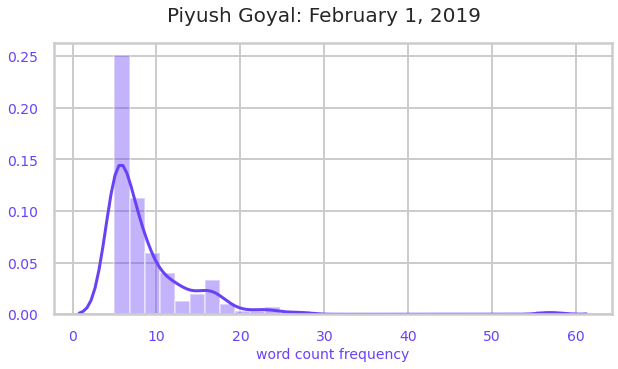

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



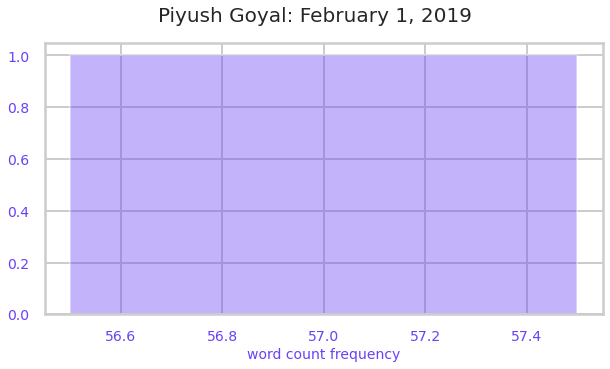

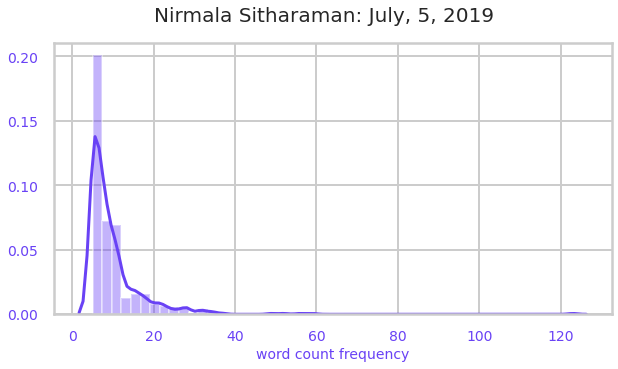

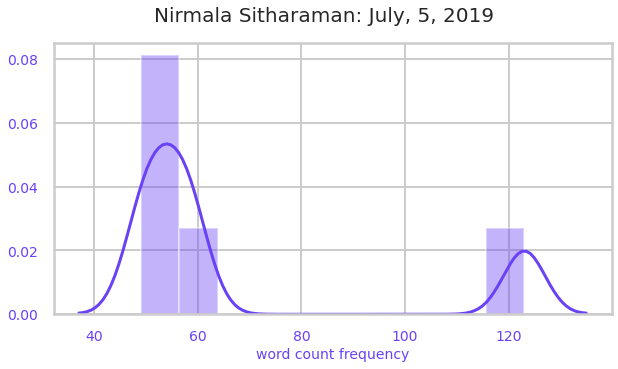

In [19]:
for i in global_word_count['title'].unique():
    a=global_word_count[global_word_count['title']==i]
    a1=a[(a['count'].between(5, a['count'].values.max()))]
    a2=a[(a['count'].between(40, a['count'].values.max()))]
    hist(a1['count'],i)
    hist(a2['count'],i)

In the next step, we will perfom Analysis based on Sentiment Values from different dictionary. 